In [1]:
import sys
sys.path.append(r'D:\Dropbox\Python Projects\IPython Notebook\Modules')

from PY_Analysis import py_method, py_dynamic

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Comparison of $f_0$ of the NREL 5MW wind turbine (with quasi-static load) in NC clay bed

Mass of pile = 635544 kg
Mass of element with lumped mass   = 299262 kg
Total mass of only the tower       = 347374 kg

Fundamental natural frequency, f_0 =  0.215-Hz

Mode  1:  Frequency =    7.961 rad/sec =  1.267 Hz, Period =   0.7892 s
Mode  2:  Frequency =    1.353 rad/sec =  0.215 Hz, Period =   4.6453 s
Mode  3:  Frequency =   21.397 rad/sec =  3.405 Hz, Period =   0.2936 s


([<matplotlib.axis.YTick at 0x12a4eda0>,
 <a list of 11 Text yticklabel objects>)

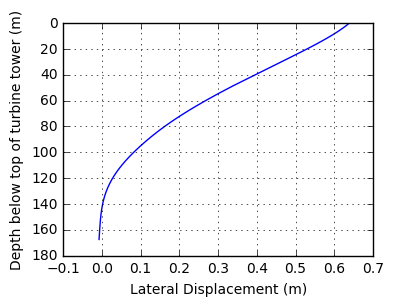

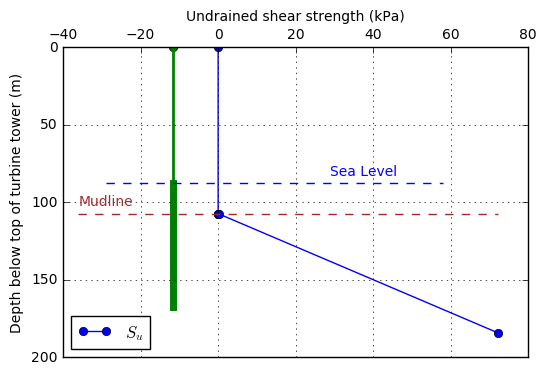

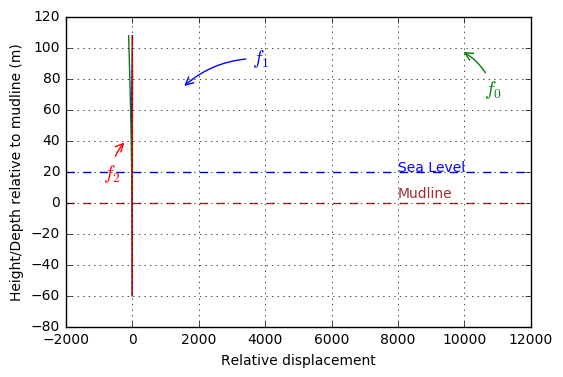

In [59]:
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.1*(L_tower+L_pile)

soil_profile = array([[z_0,               0.01, 5., 'Matlock', 0.02],
                      [z_0,                0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

py_model = 'API'

#Static analysis
F_wind = 500e3 #Wind load (N)
F_wave = 300e3 #Wave load (N)
V_0 = F_wind + F_wave
M_0 = F_wave*L_tower

y,rot,node_loc = py_dynamic.py_fe_3(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, water_depth=water_depth, E=210e9, V_0=V_0, V_n=0.0, M_0=M_0, M_n=0, 
                                  iterations=10, py_model=py_model, plot_profile='No', convergence_tracker='No', epsilon_50=0.02)

figure(figsize=(4,3))
plot(y,node_loc)
xlabel(r'Lateral Displacement (m)'), ylabel('Depth below top of turbine tower (m)'), grid(True)
ax = gca()
ax.invert_yaxis()

#Dynamic analysis 
Y_secant = zeros(len(y))
for i in range(len(y)):
    if y[i] != 0:
        Y_secant[i] = y[i]/D_pile
    else:
        Y_secant[i] = 1e-4 #To avoid numerical error if k_secant = inf or nan
        
#print Y_secant

figure(figsize=(6,4))
w,vr = py_dynamic.dyn_lat_tower_41_SI(soil_profile, Y_secant, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, py_model=py_model,
                                  lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='Yes', print_output='Yes', water_depth=water_depth, epsilon_50=0.02)

annotate('$f_0$', xy=(0.85, 0.89), xycoords='axes fraction', xytext=(0.9,0.8), color='g', fontsize=14,
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('$f_1$', xy=(0.25, 0.77), xycoords='axes fraction', xytext=(0.4,0.9), color='b', fontsize=14,
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('$f_2$', xy=(0.13, 0.6), xycoords='axes fraction', xytext=(0.08,0.53), color='r', fontsize=14,
         arrowprops=dict(color='r', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')

#Mudline/Ground surface
plot([-2000,12000],[0,0],'--',color='brown')
text(8000,3, 'Mudline',color='brown')

#Water
plot([-2000,12000],[20,20],'b--')
text(8000,20, 'Sea Level',color='b')

ylim([-80,120])
yticks(arange(-80, 120+1, 20))

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, with quasi-static wind and wave loads, Su profile, NC clay bed.pdf')
#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Presentation\Figures\NREL 5MW wind turbine, with quasi-static wind and wave loads, mode shapes, NC clay bed1.png',
#        bbox_inches='tight')

In [124]:
i=120
print node_loc1[i], y1[i]
print node_loc2[i], y2[i]
print node_loc3[i], y3[i]

plot()

57.6 0.0223484204893
117.6 0.0330106678686
117.6 0.0226689540392


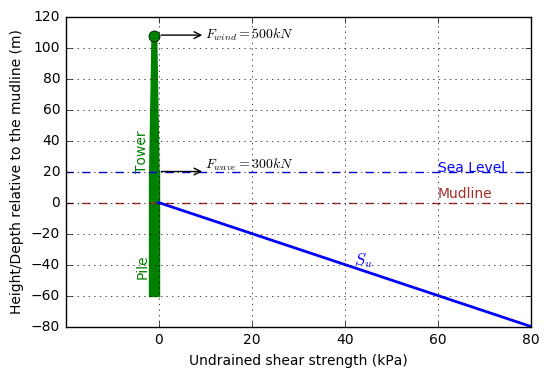

In [51]:
#Su profile
plot([0,80],[0,-80], 'b', lw=2)
text(42,-40, r'$S_u$', color='b', fontsize=12)

#Pile
fill_betweenx([20,-60],[-2,-2],[0,0],color='g')
fill_betweenx([107.6,20],[-1.5,-2],[-0.5,0],color='g')
plot(-1,107.6,'go',ms=8)
text(-5, -40., 'Pile', color='g', rotation=90)

#Tower
text(-5, 40., 'Tower', color='g', rotation=90)

#text(-8,-28.75/39.4,'Pile Head',color='k',fontsize=8)

#Mudline/Ground surface
plot([-20,100],[0,0],'--',color='brown')
text(60,3, 'Mudline',color='brown')

#Water
plot([-20,100],[20,20],'b--')
text(60,20, 'Sea Level',color='b')

#Loads
annotate('', xy=(10,108), xytext=(0,108), color='k', fontsize=12, 
         arrowprops=dict(color='k', arrowstyle='->',connectionstyle="arc3,rad=0.0"), 
         horizontalalignment='mid', verticalalignment='top')
annotate('', xy=(10,20), xytext=(0,20), color='k', fontsize=12, 
         arrowprops=dict(color='k', arrowstyle='->',connectionstyle="arc3,rad=0.0"), 
         horizontalalignment='mid', verticalalignment='top')

text(10,106, r'$F_{wind}=500kN$'), text(10,22, r'$F_{wave}=300kN$')

#Axes labels
xlabel('Undrained shear strength (kPa)')
ylabel('Height/Depth relative to the mudline (m)')
grid(True)

xlim([-19.9,80])
ylim([-80,120])
yticks(arange(-80, 120+1, 20))

#ax = gca()
#ax.invert_yaxis(), ax.xaxis.tick_top(), ax.xaxis.set_label_position('top')

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Manuscript\Figures\NREL 5MW wind turbine, NC clay bed.png',
#        dpi=600, bbox_inches='tight')

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Presentation\Figures\NREL 5MW wind turbine, NC clay bed 1.png',
#        dpi=600, bbox_inches='tight')

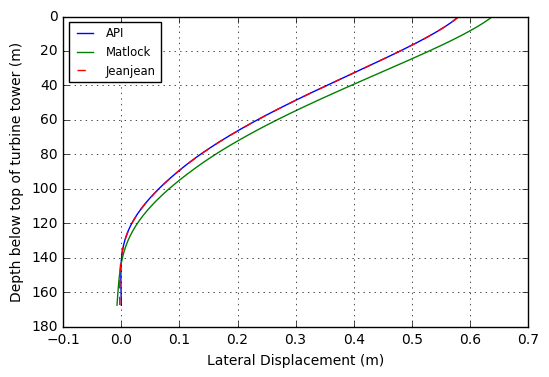

In [54]:
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.1*(L_tower+L_pile)

soil_profile = array([[z_0,               0.01, 5., 'Matlock', 0.02],
                      [z_0,                0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

#Static analysis
F_wind = 500e3 #Wind load (N)
F_wave = 300e3 #Wave load (N)
V_0 = F_wind + F_wave
M_0 = F_wave*L_tower

y1,rot,node_loc1 = py_dynamic.py_fe_3(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, water_depth=water_depth, E=210e9, V_0=V_0, V_n=0.0, M_0=M_0, M_n=0, 
                                  iterations=10, py_model='Matlock', plot_profile='No', convergence_tracker='No', epsilon_50=0.02)

y2,rot,node_loc2 = py_dynamic.py_fe_3(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, water_depth=water_depth, E=210e9, V_0=V_0, V_n=0.0, M_0=M_0, M_n=0, 
                                  iterations=10, py_model='API', plot_profile='No', convergence_tracker='No', epsilon_50=0.02)

y3,rot,node_loc3 = py_dynamic.py_fe_3(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, water_depth=water_depth, E=210e9, V_0=V_0, V_n=0.0, M_0=M_0, M_n=0, 
                                  iterations=10, py_model='Jeanjean', plot_profile='No', convergence_tracker='No', epsilon_50=0.02)

figure(figsize=(6,4))
plot(y1,node_loc1, label='API')
plot(y2,node_loc2, label='Matlock')
plot(y3,node_loc3, '--', label='Jeanjean')
xlabel(r'Lateral Displacement (m)'), ylabel('Depth below top of turbine tower (m)'), grid(True)
ax = gca()
ax.invert_yaxis()
legend(loc='best', fontsize='small')

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Manuscript\Figures\NREL 5MW wind turbine, displacement profile.pdf',
#        bbox_inches='tight')

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:69: ComplexWarning: Casting complex values to real discards the imaginary part



Run time = 42.91 sec


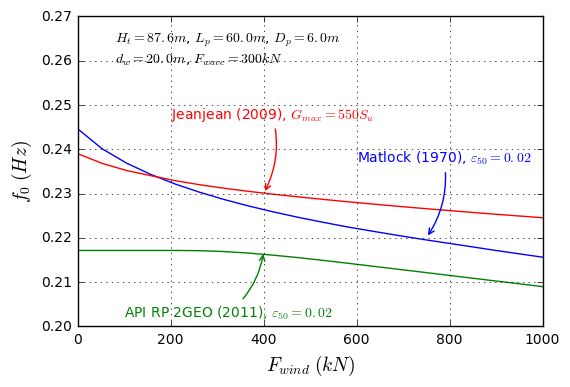

In [15]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 60
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = linspace(1e0, 1e6,20)
F_wave = 300e3

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wind),1))
f_0_jeanjean         = zeros((len(F_wind),1))
f_0_modified_matlock = zeros((len(F_wind),1))
f_0_kodikara         = zeros((len(F_wind),1))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.02])
Gmax_Su_ratio = array([550])
'''
for i in range(len(F_wind)):
    for j in [0]:
        V_0 = F_wind[i] + F_wave #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)

'''
#Plot results
figure(figsize=(6,4))
plot(F_wind/1000.,f_0_matlock, label=r'Matlock (1970), $\varepsilon_{50}=0.02$')
plot(F_wind/1000.,f_0_modified_matlock, label=r'API RP 2GEO (2011) $\varepsilon_{50}=0.02$')
plot(F_wind/1000.,f_0_jeanjean, label=r'Jeanjean (2009), $G_{max}/S_u = 550$')

ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wind} \;(kN)$', fontsize=14)
grid(True), #legend(loc='best', fontsize='small')
ylim([0.20,0.27])

text(80.,0.26, '$H_t=%3.1f m$, $L_p=%3.1f m$, $D_p=%3.1f m$ \n$d_w=%3.1fm$, $F_{wave}=%dkN$' 
     %(L_tower,L_pile-water_depth,D_pile,water_depth,F_wave/1000))

    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

annotate(r'Matlock (1970), $\varepsilon_{50}=0.02$', xy=(750, 0.22), xycoords='data', xytext=(600, 0.24), color='b', 
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('Jeanjean (2009), $G_{max}=550S_u$', xy=(400, 0.23), xycoords='data', xytext=(200, 0.25), color='r', 
         arrowprops=dict(color='r',arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate(r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$', xy=(400, 0.217), xycoords='data', xytext=(100, 0.205), color='g', 
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, f_0 vs F_wind for different p-y models, NC clay bed.pdf', 
#        bbox_inches='tight')

Jeanjean (2009) p-y models generally returns the highest estimates of $f_0$ excepth when $F_{wind} \le 200kN$. The initial stiffness of the Jeanjean (2009) model is defined by the $\frac{G_{max}}{S_u}$ ratio whereas it tends to infinity as $y \to \infty$ in the Matlock (1970) model. Therefore, Matlock (1970) p-y curves are stiffer at very low displacements and higher $f_0$ values are estimated when $F_{wind}$ is low. The API RP 2GEO (2011) model returns much lower estimates of $f_0$ than the other two models since its intial stiffness is much lower. The first discretization point in those curves is at $0.23p_{ult}$ and it forces the same secant stiffness to be used even if the mobilized soil resistance is much lower than that value. 


Run time = 0.09 sec


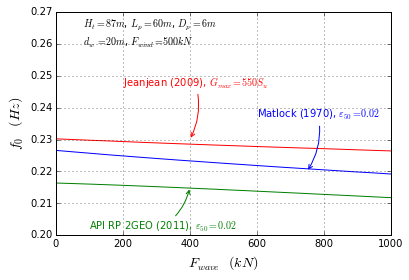

In [83]:
import time as time
start = time.time()
'''
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 60
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = 500e3
F_wave = linspace(1e0, 1e6,20)

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wave),1))
f_0_jeanjean         = zeros((len(F_wave),1))
f_0_modified_matlock = zeros((len(F_wave),1))
f_0_kodikara         = zeros((len(F_wave),1))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.02])
Gmax_Su_ratio = array([550])

for i in range(len(F_wave)):
    for j in [0]:
        V_0 = F_wind + F_wave[i] #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave[i]*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)
'''

#Plot results
figure(figsize=(6,4))
plot(F_wave/1000.,f_0_matlock, label=r'Matlock (1970), $\varepsilon_{50}=0.02$')
plot(F_wave/1000.,f_0_modified_matlock, label=r'API RP 2GEO (2011) $\varepsilon_{50}=0.02$')
plot(F_wave/1000.,f_0_jeanjean, label=r'Jeanjean (2009), $G_{max}/S_u = 550$')

ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wave} \;(kN)$', fontsize=14)
grid(True), #legend(loc='best', fontsize='small')
ylim([0.20,0.27])

text(80.,0.26, '$H_t=%dm$, $L_p=%dm$, $D_p=%dm$ \n$d_w=%dm$, $F_{wind}=%dkN$' %(L_tower, L_pile-water_depth, D_pile, water_depth, F_wind/1000.))

    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

annotate(r'Matlock (1970), $\varepsilon_{50}=0.02$', xy=(750, 0.22), xycoords='data', xytext=(600, 0.24), color='b', 
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('Jeanjean (2009), $G_{max}=550S_u$', xy=(400, 0.23), xycoords='data', xytext=(200, 0.25), color='r', 
         arrowprops=dict(color='r',arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate(r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$', xy=(400, 0.215), xycoords='data', xytext=(100, 0.205), color='g', 
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, f_0 vs F_wave for different p-y models, NC clay bed.pdf', 
#        bbox_inches='tight')

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:69: ComplexWarning: Casting complex values to real discards the imaginary part



Run time = 85.18 sec


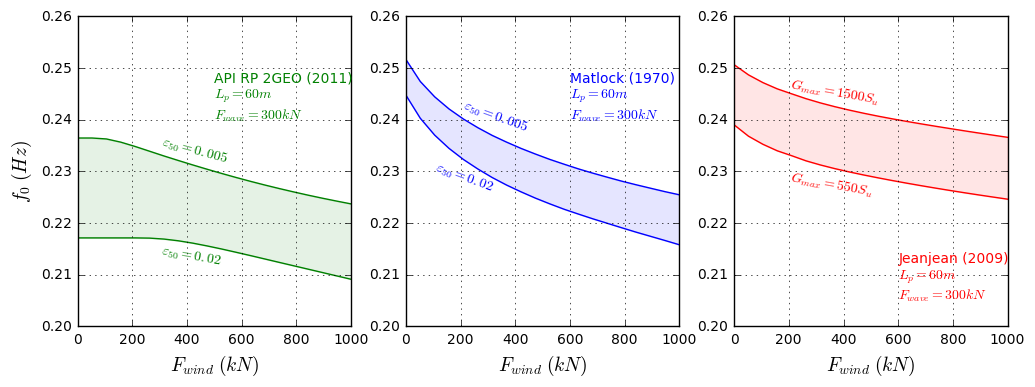

In [61]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
d_w    = 20.0 #m, water depth
z_0    = L_tower+d_w
z_max  = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = linspace(1e0, 1e6,20)
F_wave = 300e3

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wind),2))
f_0_jeanjean         = zeros((len(F_wind),2))
f_0_modified_matlock = zeros((len(F_wind),2))
f_0_kodikara         = zeros((len(F_wind),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

for i in range(len(F_wind)):
    for j in [0,1]:
        V_0 = F_wind[i] + F_wave #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)
        

#Plot results
figure(figsize=(12,4))

subplot(1,3,2)
plot(F_wind/1000.,f_0_matlock[:,0], 'b')
plot(F_wind/1000.,f_0_matlock[:,1], 'b')
fill_between(F_wind/1000.,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
xlabel('$F_{wind} \; (kN)$', fontsize=14)
grid(True)

text(600., 0.240, 'Matlock (1970)\n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w,F_wave/1000.), color='b')
text(200., 0.242, r'$\varepsilon_{50}=0.005$', color='b', rotation=-20)
text(100., 0.230, r'$\varepsilon_{50}=0.02$', color='b', rotation=-20)

subplot(1,3,1)
plot(F_wind/1000.,f_0_modified_matlock[:,0], 'g')
plot(F_wind/1000.,f_0_modified_matlock[:,1], 'g')
fill_between(F_wind/1000.,f_0_modified_matlock[:,0], f_0_modified_matlock[:,1], color='g', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wind} \; (kN)$', fontsize=14)
grid(True)

text(500., 0.240, 'API RP 2GEO (2011) \n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w,F_wave/1000.), color='g')
text(300., 0.214, r'$\varepsilon_{50}=0.02$', color='g',  rotation=-10)
text(300., 0.235, r'$\varepsilon_{50}=0.005$', color='g', rotation=-15)

subplot(1,3,3)
plot(F_wind/1000.,f_0_jeanjean[:,0], 'r')
plot(F_wind/1000.,f_0_jeanjean[:,1], 'r')
fill_between(F_wind/1000.,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
#ylabel(r'$f_0 \; (Hz)$', fontsize=14), 
xlabel('$F_{wind} \; (kN)$', fontsize=14)
grid(True)

text(600., 0.205, 'Jeanjean (2009) \n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w,F_wave/1000.), color='r')
text(200., 0.246, r'$G_{max}=1500S_u$', color='r', rotation=-10)
text(200., 0.228, r'$G_{max}=550S_u$', color='r', rotation=-10)



for i in [1,2,3]:
    subplot(1,3,i)
    ylim([0.20,0.26])
    xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Presentation\Figures\NREL 5MW wind turbine, sensitivity of f_0 to F_wind and p-y stiffness parameters, NC clay bed.png', 
#        bbox_inches='tight')


Run time = 0.20 sec


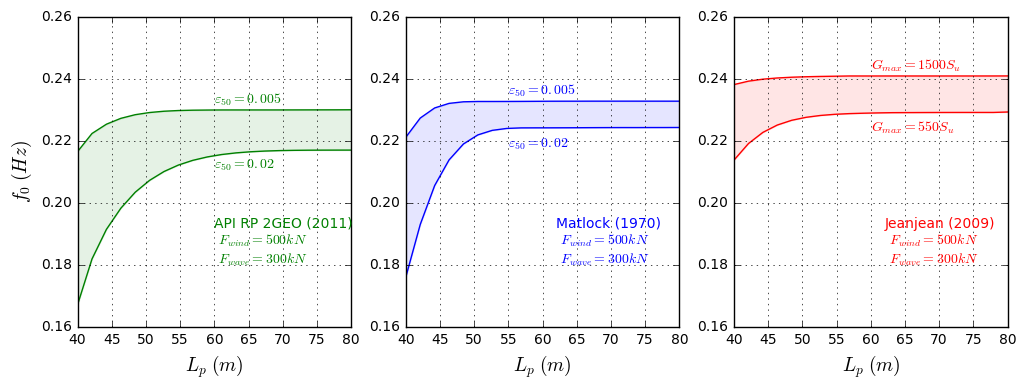

In [11]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 60.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

modes  = array([1,2,3])

#Change pile length
L_pile = linspace(60, 100,20)
'''
#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(L_pile),2))
f_0_jeanjean         = zeros((len(L_pile),2))
f_0_modified_matlock = zeros((len(L_pile),2))
f_0_kodikara         = zeros((len(L_pile),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

F_wind = 500e3
F_wave = 300e3

V_0 = F_wind + F_wave  #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top

for i in range(len(L_pile)):
    n_tower = 90
    n_pile  = int(L_pile[i]/1.0)
    #Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
    d_w    = 20.0 #m, water depth
    z_0    = L_tower+d_w
    z_max  = 1.2*(L_tower+L_pile[i])

    soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                          [z_0,  0.1, 5., 'Matlock', 0.02],
                          [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

    for j in [0,1]:
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)
        
'''
#Plot results
figure(figsize=(12,4))

subplot(1,3,2)
plot(L_pile-d_w,f_0_matlock[:,0], 'b')
plot(L_pile-d_w,f_0_matlock[:,1], 'b')
fill_between(L_pile-d_w,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
xlabel('$L_p \; (m)$', fontsize=14)
grid(True)

text(62., 0.18, 'Matlock (1970) \n $F_{wind}=%dkN$ \n $F_{wave}=%dkN$' %(F_wind/1000., F_wave/1000.), color='b')
text(55., 0.235, r'$\varepsilon_{50}=0.005$', color='b', rotation=-0)
text(55., 0.218, r'$\varepsilon_{50}=0.02$', color='b', rotation=-0)

subplot(1,3,1)
plot(L_pile-d_w,f_0_modified_matlock[:,0], 'g')
plot(L_pile-d_w,f_0_modified_matlock[:,1], 'g')
fill_between(L_pile-d_w,f_0_modified_matlock[:,0], f_0_modified_matlock[:,1], color='g', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14),  xlabel('$L_p \; (m)$', fontsize=14)
grid(True)

text(60., 0.18, 'API RP 2GEO (2011) \n $F_{wind}=%dkN$ \n $F_{wave}=%dkN$' %(F_wind/1000., F_wave/1000.), color='g')
text(60., 0.211, r'$\varepsilon_{50}=0.02$', color='g',  rotation=-0)
text(60., 0.232, r'$\varepsilon_{50}=0.005$', color='g', rotation=-0)

subplot(1,3,3)
plot(L_pile-d_w,f_0_jeanjean[:,0], 'r')
plot(L_pile-d_w,f_0_jeanjean[:,1], 'r')
fill_between(L_pile-d_w,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
#ylabel(r'$f_0 \; (Hz)$', fontsize=14), 
xlabel('$L_p \; (m)$', fontsize=14)
grid(True)

text(62., 0.18, 'Jeanjean (2009) \n $F_{wind}=%dkN$ \n $F_{wave}=%dkN$' %(F_wind/1000., F_wave/1000.), color='r')
text(60., 0.223, r'$G_{max}=550S_u$', color='r', rotation=-0)
text(60., 0.243, r'$G_{max}=1500S_u$', color='r', rotation=-0)


for i in [1,2,3]:
    subplot(1,3,i)
    ylim([0.16,0.26])
    #xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Presentation\Figures\NREL 5MW wind turbine, sensitivity of f_0 to pile length, with quasi-static wind and wave loads, NC clay bed.png', 
#        bbox_inches='tight')


Run time = 132.72 sec


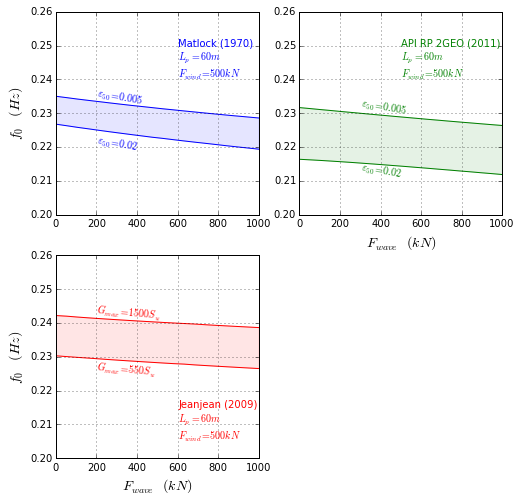

In [42]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
d_w    = 20.0 #m, water depth
z_0    = L_tower+d_w
z_max  = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  0.1, 5., 'Matlock', 0.02],
                      [z_max, (z_max-z_0)*0.94, 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = 500e3
F_wave = linspace(1e0,1e6,20)

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wave),2))
f_0_jeanjean         = zeros((len(F_wave),2))
f_0_modified_matlock = zeros((len(F_wave),2))
f_0_kodikara         = zeros((len(F_wave),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

for i in range(len(F_wave)):
    for j in [0,1]:
        V_0 = F_wind + F_wave[i] #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave[i]*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)
        

#Plot results
figure(figsize=(8,8))

subplot(2,2,1)
plot(F_wave/1000.,f_0_matlock[:,0], 'b')
plot(F_wave/1000.,f_0_matlock[:,1], 'b')
fill_between(F_wave/1000.,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), #xlabel('Lateral load (kN)')
grid(True)

text(600., 0.240, 'Matlock (1970)\n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='b')
text(200., 0.235, r'$\varepsilon_{50}=0.005$', color='b', rotation=-10)
text(200., 0.221, r'$\varepsilon_{50}=0.02$', color='b', rotation=-10)

subplot(2,2,2)
plot(F_wave/1000.,f_0_modified_matlock[:,0], 'g')
plot(F_wave/1000.,f_0_modified_matlock[:,1], 'g')
fill_between(F_wave/1000.,f_0_modified_matlock[:,0], f_0_modified_matlock[:,1], color='g', alpha=0.1)
xlabel('$F_{wave} \; (kN)$', fontsize=14)
grid(True)

text(500., 0.240, 'API RP 2GEO (2011) \n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='g')
text(300., 0.213, r'$\varepsilon_{50}=0.02$', color='g',  rotation=-10)
text(300., 0.232, r'$\varepsilon_{50}=0.005$', color='g', rotation=-10)

subplot(2,2,3)
plot(F_wave/1000.,f_0_jeanjean[:,0], 'r')
plot(F_wave/1000.,f_0_jeanjean[:,1], 'r')
fill_between(F_wave/1000.,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wave} \; (kN)$', fontsize=14)
grid(True)

text(600., 0.205, 'Jeanjean (2009) \n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='r')
text(200., 0.243, r'$G_{max}=1500S_u$', color='r', rotation=-5)
text(200., 0.226, r'$G_{max}=550S_u$', color='r', rotation=-5)



for i in [1,2,3]:
    subplot(2,2,i)
    ylim([0.20,0.26])
    xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, sensitivity of f_0 to F_wave and p-y stiffness parameters, NC clay bed.pdf', 
#        bbox_inches='tight')

### Comparison of $f_0$ of the NREL 5MW wind turbine (with quasi-static load) in OC clay bed

Mass of pile = 635544 kg
Mass of element with lumped mass   = 299262 kg
Total mass of only the tower       = 347374 kg

Fundamental natural frequency, f_0 =  0.244-Hz

Mode  1:  Frequency =    9.815 rad/sec =  1.562 Hz, Period =   0.6402 s
Mode  2:  Frequency =    1.535 rad/sec =  0.244 Hz, Period =   4.0932 s
Mode  3:  Frequency =   27.307 rad/sec =  4.346 Hz, Period =   0.2301 s


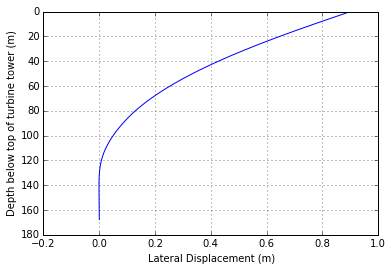

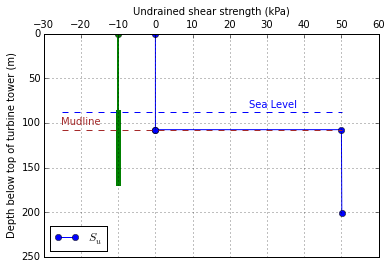

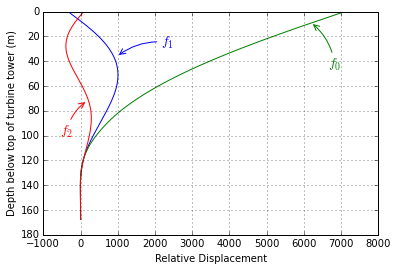

In [78]:
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  50., 5., 'Matlock', 0.02],
                      [z_max, 50.1, 5., 'Matlock', 0.02]])

#Static analysis
F_wind = 500e3 #Wind load (N)
F_wave = 300e3 #Wave load (N)
V_0 = F_wind + F_wave
M_0 = F_wave*L_tower

y,rot,node_loc = py_dynamic.py_fe_3(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, water_depth=water_depth, E=210e9, V_0=V_0, V_n=0.0, M_0=0.0, M_n=0.0, 
                                  iterations=10, py_model='Matlock', plot_profile='No', convergence_tracker='No', epsilon_50=0.02)

figure()
plot(y,node_loc)
xlabel(r'Lateral Displacement (m)'), ylabel('Depth below top of turbine tower (m)'), grid(True)
ax = gca()
ax.invert_yaxis()

#Dynamic analysis 
Y_secant = zeros(len(y))
for i in range(len(y)):
    if y[i] != 0:
        Y_secant[i] = y[i]/D_pile
    else:
        Y_secant[i] = 1e-4 #To avoid numerical error if k_secant = inf or nan
        
#print Y_secant

figure()
w,vr = py_dynamic.dyn_lat_tower_41_SI(soil_profile, Y_secant, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                  D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, py_model='Matlock',
                                  lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='Yes', print_output='Yes', water_depth=water_depth, epsilon_50=0.02)

annotate('$f_0$', xy=(0.80, 0.95), xycoords='axes fraction', xytext=(0.85,0.8), color='g', fontsize=14,
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('$f_1$', xy=(0.22, 0.8), xycoords='axes fraction', xytext=(0.35,0.9), color='b', fontsize=14,
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('$f_2$', xy=(0.13, 0.6), xycoords='axes fraction', xytext=(0.05,0.5), color='r', fontsize=14,
         arrowprops=dict(color='r', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, with quasi-static wind and wave loads, Su profile, OC clay bed.pdf')
#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, with quasi-static wind and wave loads, mode shapes, OC clay bed.pdf')


Run time = 0.08 sec


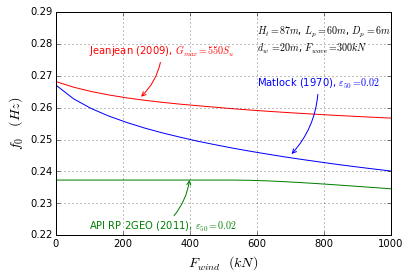

In [22]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  50., 5., 'Matlock', 0.02],
                      [z_max, 50., 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = linspace(1e0, 1e6,20)
F_wave = 300e3

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wind),1))
f_0_jeanjean         = zeros((len(F_wind),1))
f_0_modified_matlock = zeros((len(F_wind),1))
f_0_kodikara         = zeros((len(F_wind),1))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.02])
Gmax_Su_ratio = array([550])

for i in range(len(F_wind)):
    for j in [0]:
        V_0 = F_wind[i] + F_wave #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)


#Plot results
figure(figsize=(6,4))
plot(F_wind/1000.,f_0_matlock, label=r'Matlock (1970), $\varepsilon_{50}=0.02$')
plot(F_wind/1000.,f_0_modified_matlock, label=r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$')
plot(F_wind/1000.,f_0_jeanjean, label=r'Jeanjean (2009), $G_{max} = 550S_u$')

ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wind} \;(kN)$', fontsize=14)
grid(True), #legend(loc='best', fontsize='small')
ylim([0.22,0.29])

text(600.,0.278, '$H_t=%dm$, $L_p=%dm$, $D_p=%dm$ \n$d_w=%dm$, $F_{wave}=%dkN$' %(L_tower, L_pile-water_depth, D_pile, water_depth, F_wave/1000.))
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

annotate(r'Matlock (1970), $\varepsilon_{50}=0.02$', xy=(700, 0.245), xycoords='data', xytext=(600, 0.27), color='b', 
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('Jeanjean (2009), $G_{max}=550S_u$', xy=(250, 0.263), xycoords='data', xytext=(100, 0.28), color='r', 
         arrowprops=dict(color='r',arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate(r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$', xy=(400, 0.238), xycoords='data', xytext=(100, 0.225), color='g', 
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, f_0 vs F_wind for different p-y models, OC clay bed.pdf', 
#        bbox_inches='tight')


Run time = 0.06 sec


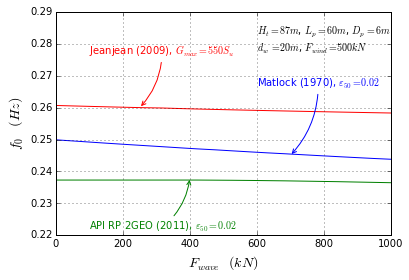

In [81]:
import time as time
start = time.time()
'''
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
water_depth = 20.0 #m
z_0         = L_tower+water_depth 
z_max       = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  50., 5., 'Matlock', 0.02],
                      [z_max, 50., 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = 500e3
F_wave = linspace(1e0, 1e6,20)

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wave),1))
f_0_jeanjean         = zeros((len(F_wave),1))
f_0_modified_matlock = zeros((len(F_wave),1))
f_0_kodikara         = zeros((len(F_wave),1))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.02])
Gmax_Su_ratio = array([550])

for i in range(len(F_wave)):
    for j in [0]:
        V_0 = F_wind + F_wave[i] #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave[i]*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)

'''
#Plot results
figure(figsize=(6,4))
plot(F_wave/1000.,f_0_matlock, label=r'Matlock (1970), $\varepsilon_{50}=0.02$')
plot(F_wave/1000.,f_0_modified_matlock, label=r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$')
plot(F_wave/1000.,f_0_jeanjean, label=r'Jeanjean (2009), $G_{max} = 550S_u$')

ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wave} \;(kN)$', fontsize=14)
grid(True), #legend(loc='best', fontsize='small')
ylim([0.22,0.29])

text(600.,0.278, '$H_t=%dm$, $L_p=%dm$, $D_p=%dm$ \n$d_w=%dm$, $F_{wind}=%dkN$' %(L_tower, L_pile-water_depth, D_pile, water_depth, F_wind/1000.))
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

annotate(r'Matlock (1970), $\varepsilon_{50}=0.02$', xy=(700, 0.245), xycoords='data', xytext=(600, 0.27), color='b', 
         arrowprops=dict(color='b', arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate('Jeanjean (2009), $G_{max}=550S_u$', xy=(250, 0.260), xycoords='data', xytext=(100, 0.28), color='r', 
         arrowprops=dict(color='r',arrowstyle='->',connectionstyle="arc3,rad=-0.2"), horizontalalignment='mid', verticalalignment='top')
annotate(r'API RP 2GEO (2011), $\varepsilon_{50}=0.02$', xy=(400, 0.238), xycoords='data', xytext=(100, 0.225), color='g', 
         arrowprops=dict(color='g', arrowstyle='->',connectionstyle="arc3,rad=0.2"), horizontalalignment='mid', verticalalignment='top')

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, f_0 vs F_wave for different p-y models, OC clay bed.pdf', 
#        bbox_inches='tight')


Run time = 0.21 sec


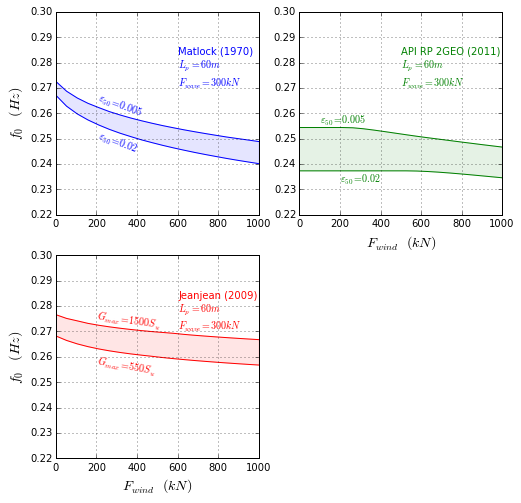

In [33]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
d_w    = 20.0 #water depth (m)
z_0    = L_tower + d_w 
z_max  = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  50., 5., 'Matlock', 0.02],
                      [z_max, 50., 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = linspace(1e0, 1e6,20)
F_wave = 300e3

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wind),2))
f_0_jeanjean         = zeros((len(F_wind),2))
f_0_modified_matlock = zeros((len(F_wind),2))
f_0_API              = zeros((len(F_wind),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

for i in range(len(F_wind)):
    for j in [0,1]:
        V_0 = F_wind[i] + F_wave #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_API[i,j] = min(w)/(2*pi)
        

#Plot results
figure(figsize=(8,8))

subplot(2,2,1)
plot(F_wind/1000.,f_0_matlock[:,0], 'b')
plot(F_wind/1000.,f_0_matlock[:,1], 'b')
fill_between(F_wind/1000.,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), #xlabel('Lateral load (kN)')
grid(True)

text(600., 0.27, 'Matlock (1970)\n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w, F_wave/1000.), color='b')
text(200., 0.265, r'$\varepsilon_{50}=0.005$', color='b', rotation=-20)
text(200., 0.250, r'$\varepsilon_{50}=0.02$', color='b', rotation=-20)

subplot(2,2,2)
plot(F_wind/1000.,f_0_API[:,0], 'g')
plot(F_wind/1000.,f_0_API[:,1], 'g')
fill_between(F_wind/1000.,f_0_API[:,0], f_0_API[:,1], color='g', alpha=0.1)
xlabel('$F_{wind} \; (kN)$', fontsize=14)
grid(True)

text(500., 0.27, 'API RP 2GEO (2011)\n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w, F_wave/1000.), color='g')
text(200., 0.233, r'$\varepsilon_{50}=0.02$', color='g',  rotation=0)
text(100., 0.256, r'$\varepsilon_{50}=0.005$', color='g', rotation=0)

subplot(2,2,3)
plot(F_wind/1000.,f_0_jeanjean[:,0], 'r')
plot(F_wind/1000.,f_0_jeanjean[:,1], 'r')
fill_between(F_wind/1000.,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wind} \; (kN)$', fontsize=14)
grid(True)

text(600., 0.27, 'Jeanjean (2009) \n$L_p=%dm$ \n$F_{wave}=%dkN$' %(L_pile-d_w, F_wave/1000.), color='r')
text(200., 0.275, r'$G_{max}=1500S_u$', color='r', rotation=-8)
text(200., 0.257, r'$G_{max}=550S_u$', color='r', rotation=-10)


for i in [1,2,3]:
    subplot(2,2,i)
    ylim([0.22,0.30])
    xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, sensitivity of f_0 to F_wind and p-y stiffness parameters, OC clay bed.pdf', 
#        bbox_inches='tight')


Run time = 80.72 sec


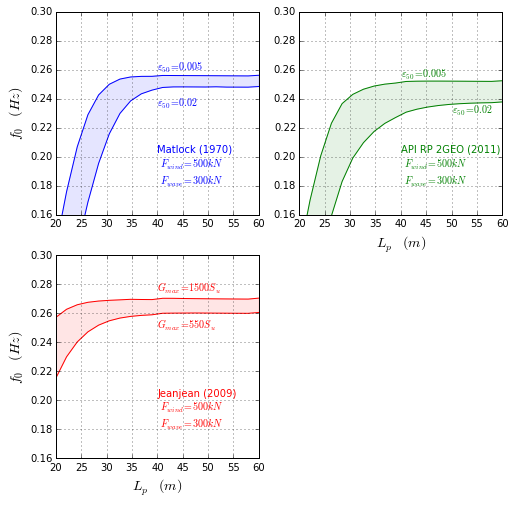

In [34]:
import time as time
start = time.time()

#Structure geometry
L_tower = 87.6 #m
L_pile  = 60.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

modes  = array([1,2,3])

#Change pile length
L_pile = linspace(40, 80,20)

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(L_pile),2))
f_0_jeanjean         = zeros((len(L_pile),2))
f_0_modified_matlock = zeros((len(L_pile),2))
f_0_kodikara         = zeros((len(L_pile),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

F_wind = 500e3
F_wave = 300e3

V_0 = F_wind + F_wave  #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
M_0 = F_wave*L_tower   #Counter act the fact that the wave load is being applid at the tower top

for i in range(len(L_pile)):
    n_tower = 60
    n_pile  = int(L_pile[i]/1.0)
    #Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
    water_depth = 20.0 #m
    z_0         = L_tower+water_depth 
    z_max       = 1.2*(L_tower+L_pile[i])

    soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                          [z_0,  50., 5., 'Matlock', 0.02],
                          [z_max, 50., 5., 'Matlock', 0.02]])

    for j in [0,1]:
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile[i], n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=water_depth,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)

        


#Plot results
figure(figsize=(8,8))

subplot(2,2,1)
plot(L_pile-water_depth,f_0_matlock[:,0], 'b')
plot(L_pile-water_depth,f_0_matlock[:,1], 'b')
fill_between(L_pile-water_depth,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), #xlabel('Lateral load (kN)')
grid(True)

text(40., 0.18, 'Matlock (1970) \n $F_{wind}=500kN$ \n $F_{wave}=300kN$', color='b')
text(40., 0.260, r'$\varepsilon_{50}=0.005$', color='b', rotation=-0)
text(40., 0.235, r'$\varepsilon_{50}=0.02$', color='b', rotation=-0)

subplot(2,2,2)
plot(L_pile-water_depth,f_0_modified_matlock[:,0], 'g')
plot(L_pile-water_depth,f_0_modified_matlock[:,1], 'g')
fill_between(L_pile-water_depth,f_0_modified_matlock[:,0], f_0_modified_matlock[:,1], color='g', alpha=0.1)
xlabel('$L_p \; (m)$', fontsize=14)
grid(True)

text(40., 0.18, 'API RP 2GEO (2011) \n $F_{wind}=500kN$ \n $F_{wave}=300kN$', color='g')
text(40., 0.255, r'$\varepsilon_{50}=0.005$', color='g',  rotation=-0)
text(50., 0.230, r'$\varepsilon_{50}=0.02$', color='g', rotation=-0)

subplot(2,2,3)
plot(L_pile-water_depth,f_0_jeanjean[:,0], 'r')
plot(L_pile-water_depth,f_0_jeanjean[:,1], 'r')
fill_between(L_pile-water_depth,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
grid(True)

text(40., 0.18, 'Jeanjean (2009) \n $F_{wind}=500kN$ \n $F_{wave}=300kN$', color='r')
text(40., 0.275, r'$G_{max}=1500S_u$', color='r', rotation=-0)
text(40., 0.250, r'$G_{max}=550S_u$', color='r', rotation=-0)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$L_p \; (m)$', fontsize=14)


for i in [1,2,3]:
    subplot(2,2,i)
    ylim([0.16,0.30])
    #xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, sensitivity of f_0 to pile length, with quasi-static wind and wave loads, OC clay bed.pdf', 
#        bbox_inches='tight')

The above plots show the effect that different p-y models have on the natural frequency calculation. There are several important points to note from the above results.
1. There is a critical length of the monopile beyond which no further increase in $f_0$ can be gained by lengthening the pile. This critical length depends on both the p-y model and the value of their stiffness parameters (i.e. $\varepsilon_{50}$, $G_{max}$). 
2. There is only a very small difference between the Matlock (1970) and the API RP 2GEO (2011) p-y curves in this case. The API RP 2GEO (2011) model was expected to return lower values of $f_0$ as the initial stiffness of those p-y curves are much lower than those of the Matlock (1970) model. While the results are consistent with this expectation, $f_0$ based on the API RP 2GEO (2011) model is only about 0.1Hz lower than the $f_0$ based on Matlock (1970).
3. The results from the Jeanjean (2009) model show that $f_0$ only increase about 0.1Hz when the value of $G_{max}$ increases from 550 to 1500. This is important because laboratory shear wave velocity measurements in normally consolidated kaolinite clay showed that $1000 < G_{max} < 2000$ whereas Jeanjean (2009) recommended a much lower value of 550. 


Run time = 0.16 sec


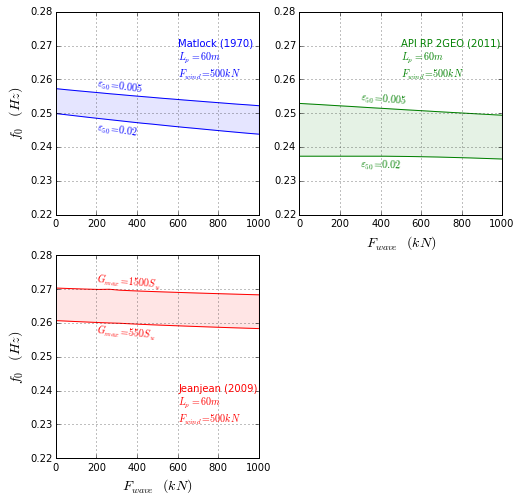

In [41]:
import time as time
start = time.time()
'''
#Structure geometry
L_tower = 87.6 #m
L_pile  = 80.0 #m
D_pile  = 6.0  #m
t_pile  = 0.05 #m
E       = 210e9  #Pa
rho     = 8500.0 #kg/m3

mass_nacelle = 2.4e5 #kg
mass_hub     = 5.678e4 #kg
lumped_mass  = mass_nacelle + mass_hub

n_tower = 90
n_pile  = 80
n_elem  = n_tower + n_pile

modes  = array([1,2,3])

#Design soil profile with 6psf/ft --> 0.94kPa/m Su versus depth gradient
d_w    = 20.0 #m, water depth
z_0    = L_tower+d_w
z_max  = 1.2*(L_tower+L_pile)

soil_profile = array([[z_0, 0.01, 5., 'Matlock', 0.02],
                      [z_0,  50., 5., 'Matlock', 0.02],
                      [z_max, 50., 5., 'Matlock', 0.02]])

#Change wind loads
F_wind = 500e3
F_wave = linspace(1e0,1e6,20)

#Pre-allocate arrays to store f_0 values
f_0_matlock          = zeros((len(F_wave),2))
f_0_jeanjean         = zeros((len(F_wave),2))
f_0_modified_matlock = zeros((len(F_wave),2))
f_0_kodikara         = zeros((len(F_wave),2))

#Bounds of the p-y curves stiffness parameters
epsilon_50 = array([0.005, 0.02])
Gmax_Su_ratio = array([550,1500])

for i in range(len(F_wave)):
    for j in [0,1]:
        V_0 = F_wind + F_wave[i] #Both the wind and the wave load is applied at the tower top. F_wave has to be applied at the water level M_0 will account for this.
        M_0 = F_wave[i]*L_tower   #Counter act the fact that the wave load is being applid at the tower top
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Matlock', epsilon_50=epsilon_50[j])

        f_0_matlock[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='Jeanjean', Gmax_Su_ratio=Gmax_Su_ratio[j])

        f_0_jeanjean[i,j] = min(w)/(2*pi)
        
        w,vr = py_dynamic.dyn_lat_tower_5_SI(soil_profile, D_tower_bot=6.0, D_tower_top=3.87, t_tower_bot=0.027*1.3, t_tower_top=0.019*1.3, L_tower=L_tower, n_tower=n_tower,
                                          D_pile=D_pile, t_pile=t_pile, L_pile=L_pile, n_pile=n_pile, rho=rho, E=E, modes=modes, water_depth=d_w,
                                          V_0=V_0,M_0=M_0,
                                          lumped_mass=lumped_mass, lumped_mass_loc=0, plot_profile='No', print_output='No', py_model='API', epsilon_50=epsilon_50[j])
        
        f_0_modified_matlock[i,j] = min(w)/(2*pi)       
'''

#Plot results
figure(figsize=(8,8))

subplot(2,2,1)
plot(F_wave/1000.,f_0_matlock[:,0], 'b')
plot(F_wave/1000.,f_0_matlock[:,1], 'b')
fill_between(F_wave/1000.,f_0_matlock[:,0], f_0_matlock[:,1], color='b', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), #xlabel('Lateral load (kN)')
grid(True)

text(600., 0.260, 'Matlock (1970)\n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='b')
text(200., 0.258, r'$\varepsilon_{50}=0.005$', color='b', rotation=-8)
text(200., 0.245, r'$\varepsilon_{50}=0.02$', color='b', rotation=-8)

subplot(2,2,2)
plot(F_wave/1000.,f_0_modified_matlock[:,0], 'g')
plot(F_wave/1000.,f_0_modified_matlock[:,1], 'g')
fill_between(F_wave/1000.,f_0_modified_matlock[:,0], f_0_modified_matlock[:,1], color='g', alpha=0.1)
xlabel('$F_{wave} \; (kN)$', fontsize=14)
grid(True)

text(500., 0.260, 'API RP 2GEO (2011) \n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='g')
text(300., 0.234, r'$\varepsilon_{50}=0.02$', color='g',  rotation=-2)
text(300., 0.254, r'$\varepsilon_{50}=0.005$', color='g', rotation=-5)

subplot(2,2,3)
plot(F_wave/1000.,f_0_jeanjean[:,0], 'r')
plot(F_wave/1000.,f_0_jeanjean[:,1], 'r')
fill_between(F_wave/1000.,f_0_jeanjean[:,0], f_0_jeanjean[:,1], color='r', alpha=0.1)
ylabel(r'$f_0 \; (Hz)$', fontsize=14), xlabel('$F_{wave} \; (kN)$', fontsize=14)
grid(True)

text(600., 0.23, 'Jeanjean (2009) \n$L_p=%dm$ \n$F_{wind}=%dkN$' %(L_pile-d_w,F_wind/1000.), color='r')
text(200., 0.272, r'$G_{max}=1500S_u$', color='r', rotation=-5)
text(200., 0.257, r'$G_{max}=550S_u$', color='r', rotation=-5)



for i in [1,2,3]:
    subplot(2,2,i)
    ylim([0.22,0.28])
    xlim([0,1000])
    
stop = time.time()
print '\nRun time = %.2f sec' %(stop - start)

#savefig(r'D:\Dropbox\UT\Research\Thesis\Draft - UT Dissertation Format\Figures\Dynamic Analysis\NREL 5MW wind turbine, sensitivity of f_0 to F_wave and p-y stiffness parameters, OC clay bed.pdf', 
#        bbox_inches='tight')

###Campbell Diagram for the NREL 5MW Reference Wind Turbine

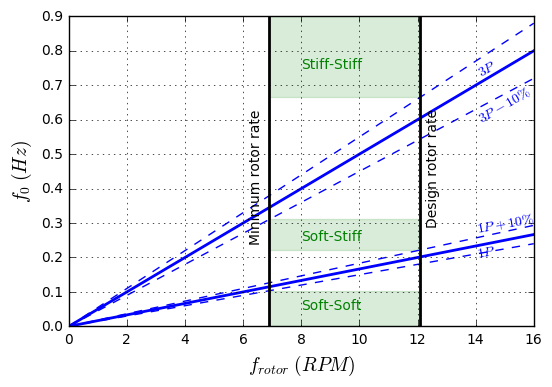

In [31]:
rpm_rotor_cut_in = 6.9  #rpm
rpm_rotor_rated  = 12.1 #rpm

rpm_rotor = linspace(0,16,5)
f_1p    = rpm_rotor/60.
f_3p    = 3*rpm_rotor/60.

#Plot only the axes
plot(0,0), xlim(0,16), ylim(0,0.9)

#Plot 1P and 3P frequencies
plot(rpm_rotor, f_1p, 'b-', label=r'$1P$ Frequency', lw=2)
plot(rpm_rotor, 1.1*f_1p, 'b--', label=r'$1P + 10\%$', lw=1)
plot(rpm_rotor, 0.9*f_1p, 'b--', lw=1)

plot(rpm_rotor, f_3p, 'b-', label=r'$3P$ Frequency', lw=2)
plot(rpm_rotor, 0.9*f_3p, 'b--', label=r'$3P - 10\%$', lw=1)
plot(rpm_rotor, 1.1*f_3p, 'b--', lw=1)

#Plot cut-in and rated rotor frequencies
plot([rpm_rotor_cut_in, rpm_rotor_cut_in],[0,0.9], 'k', lw=2)
plot([rpm_rotor_rated, rpm_rotor_rated],[0,0.9], 'k', lw=2)

text(6.2,0.6, 'Minimum rotor rate', rotation=90)
text(12.3,0.6, 'Design rotor rate', rotation=90)

#Possible region of f_0
x1 = array([rpm_rotor_cut_in,rpm_rotor_rated])
y1 = array([3*rpm_rotor_cut_in/60.,3*rpm_rotor_cut_in/60.])
y2 = array([rpm_rotor_rated/60.,rpm_rotor_rated/60.])
y3 = array([3*rpm_rotor_rated/60.,3*rpm_rotor_rated/60.])
y4 = array([rpm_rotor_cut_in/60.,rpm_rotor_cut_in/60.])

fill_between(x1,0.9*y1,1.1*y2, color='g', alpha=0.15)
fill_between(x1,1.1*y3,0.9, color='g', alpha=0.15)
fill_between(x1,0.0,0.9*y4, color='g', alpha=0.15)

text(8,0.25, 'Soft-Stiff', color='g')
text(8,0.75, 'Stiff-Stiff', color='g')
text(8,0.05, 'Soft-Soft', color='g')

xlabel(r'$f_{rotor} \;(RPM)$', fontsize=14), ylabel(r'$f_{0} \;(Hz)$', fontsize=14)
grid(True), #legend(loc='upper left', fontsize='small')

text(14,0.75, '$3P$', color='b', rotation=30)
text(14,0.67, '$3P-10\%$', color='b', rotation=30)
text(14,0.21, '$1P$', color='b', rotation=10)
text(14,0.30, '$1P+10\%$', color='b', rotation=10)

#savefig(r'D:\Dropbox\UT\Research\Fall 2016\Papers\OTC 2017\Manuscript\Figures\NREL 5MW wind turbine, Campbell diagram 7.png', 
#        bbox_inches='tight', dpi=300)